# Panda - Dataset Analysis

-> Analysis Scope: Date: April 1 2016 to March 2017
-> When you find blank / NA cell details, fill in most appropriate data
-> When you see typo errors, classify to the right bucket
-> You need to ignore data that are not having sufficient critical information

1) Analyze which day of the week on average, TestLeaf had the most number of calls and which had the least calls? 

	Business Outcome: We want to plan week offs, spread load based on the data analytics

2) Analyze the top 3 companies that contributed to our most number of calls across training programs?

	Business Outcome: We want to focus on the top 3 companies through our referral strategy

3) Analyze the age group of learners that have shown interest in learning any program?

	Business Outcome: We want to do marketing strategy for such group of learners

Scenario to be solved:
3) Analyze the age group of learners that have shown interest in learning any program?
	Business Outcome: We want to do marketing strategy for such group of learners
    
Steps followed:
 1) Load the csv file into dataframe
 2) convert the date column from string to date format
 3) identify the columns to arrive at the age group
 4) Columns - col1 = 'Organization',col2= 'Years of Overall Experience', col3 = 'Years of Experience' to be used
 5) filter the rows for the condition - April 1,2016 to Mar 31, 2017
 6) Greater of col2 and col3 will be considered as total_years_exp
 7) Update Orgnaization column as NaN, if the value is ['0', 'nan', 'nil', 'no', 'no name', 'noname', 'not', 'not disclosed', 'not given', 'not known', 'not woking ', 'not working', 'Not working', 'Not Working', 'not working (Teminos)', 'not working now', 'notworking', 'Notworking']s
 8) After the above point, if total_years_exp value is 0, populate it with mean(total_years_exp) if Orgaization column has a value other than NaN
 9) BaseAge is assumed as 22
 10) Add BaseAge to the total_years_exp
 11) Based on the Age range given, provide the frequency distribution

In [36]:
import pandas as pd
import numpy as np

In [37]:
#1) Load the csv file into dataframe - Load only the necessary columns from csv to dataframe
#2) convert the date column from string to date format

# Create a list of all column names for loading into dataframe
cols_select=['Entry Date Time','Learning Interest','Organization','Years of Overall Experience','Source of connect','Years of Experience','Your time spent on the call','Probability of join ','Status']

# parameter usecols --> for loading only specific set of columns. you can directly give the column names 
# or a list having the column names
# parameter parse_dates --> to convert a particular column(s) to date format
df = pd.read_csv("Panda Analysis.csv",usecols=cols_select,parse_dates=['Entry Date Time'])

# to do a check if the dataframe has been loaded. only first 5 records will be displayed
df.head()


,Entry Date Time,Learning Interest,Organization,Years of Overall Experience,Source of connect,Years of Experience,Your time spent on the call,Probability of join,Status
0,2016-04-04 10:10:00,Selenium,Intellect,6.0,Reference,6.0,0.0,Quite possible to come (75 to 100),NaN
1,2016-09-13 15:20:00,HP UFT,Sifi,10.0,Alumni,10.0,0.0,Quite possible to come (75 to 100),NaN
2,2016-09-15 18:00:00,HP UFT,Technosoft,3.0,Email,3.0,0.0,not picked the call,NaN
3,2016-09-19 18:00:00,HP UFT,Mind Tree,6.0,Internet,6.0,2.0,Quite possible to come (75 to 100),Registered
4,2016-10-06 11:30:00,Selenium,Infosys,5.0,Reference,5.0,10.0,Quite possible to come (75 to 100),NaN


In [38]:
#3) identify the columns to arrive at the age group
#4) Columns - col1 = 'Organization',col2= 'Years of Overall Experience', col3 = 'Years of Experience' to be used

#In the column - Entry Date Time, to split only the date value, use .date
# Here, the date value is split from the Entry Date Time column and stored into a new column 'just_date'
df['just_date'] = pd.to_datetime(df['Entry Date Time'].dt.date)

#convert the specific column values as numeric, use to_numeric function
# the parameter errors='coerce' is used to populate the non-numeric values as NaN
df['Years of Overall Experience'] = pd.to_numeric(df['Years of Overall Experience'], errors='coerce')
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')

#To populate the specific column value havig NaN as 0
df['Years of Overall Experience'] = df['Years of Overall Experience'].fillna(0)
df['Years of Experience']  = df['Years of Experience'].fillna(0)

#To delete the column from dataframe
df.drop(columns=['Entry Date Time'])



,Learning Interest,Organization,Years of Overall Experience,Source of connect,Years of Experience,Your time spent on the call,Probability of join,Status,just_date
0,Selenium,Intellect,6.0,Reference,6.0,0.00,Quite possible to come (75 to 100),NaN,2016-04-04
1,HP UFT,Sifi,10.0,Alumni,10.0,0.00,Quite possible to come (75 to 100),NaN,2016-09-13
2,HP UFT,Technosoft,3.0,Email,3.0,0.00,not picked the call,NaN,2016-09-15
3,HP UFT,Mind Tree,6.0,Internet,6.0,2.00,Quite possible to come (75 to 100),Registered,2016-09-19
4,Selenium,Infosys,5.0,Reference,5.0,10.00,Quite possible to come (75 to 100),NaN,2016-10-06
5,Selenium,IBM,0.0,Reference,1.0,10.00,Quite possible to come (75 to 100),Visited but not registered,2016-10-14
6,HP UFT,Capgemini,8.0,Email,4.0,0.00,Quite possible to come (75 to 100),Registered,2016-10-16
7,Selenium,Ntt data global delivery services pvt Lmt,5.0,Reference,5.0,10.00,Quite possible to come (75 to 100),Registered,2016-10-17
8,"Loadrunner, JMeter, Jmeter Workshop",GMI,1.0,Alumni,1.0,6.00,Not really interested (25 to 50),Registered,2016-10-17
9,JMeter,Wipro Technologies,4.0,Alumni,4.0,2.00,May need followup (50 to 75),Registered,2016-10-20


In [7]:

# to chage the order of the columns - here bringing the just_date column as the first column
cols_reorg=['just_date','Learning Interest','Organization','Years of Overall Experience','Source of connect','Years of Experience','Your time spent on the call','Probability of join ','Status']
df[cols_reorg]

# 5) filter the rows for the condition - April 1,2016 to Mar 31, 2017
# the filter to select the rows based on the date filter
start_date = '2016-04-01'
end_date = '2017-03-31'
df=df[(df['just_date'] >= start_date) & (df['just_date'] <= end_date)]

#  6) Greater of col2 and col3 will be considered as total_years_exp
# create a new column - here we copy the value based on condition
# create a filter and assign it to a variable for future use
df['total_exp'] = df['Years of Overall Experience'] 
mask = ((df['total_exp'] == 0) | (df['Years of Experience'] > df['Years of Overall Experience']) )
df.loc[mask, 'total_exp'] = df.loc[mask, 'Years of Experience']


,Entry Date Time,Learning Interest,Organization,Years of Overall Experience,Source of connect,Years of Experience,Your time spent on the call,Probability of join,Status,just_date,total_exp
5,2016-10-14 16:00:00,Selenium,IBM,0.0,Reference,1.0,10.0,Quite possible to come (75 to 100),Visited but not registered,2016-10-14,1.0
18,2016-11-01 17:13:00,Selenium,Hexaware,0.0,Internet,6.0,3.0,Quite possible to come (75 to 100),Registered,2016-11-01,6.0
20,2016-11-01 18:16:00,Selenium,NaN,0.0,Alumni,4.0,0.0,Quite possible to come (75 to 100),Registered,2016-11-01,4.0
45,2016-11-04 12:12:00,Selenium,amazon,0.0,Reference,3.0,8.0,Quite possible to come (75 to 100),NaN,2016-11-04,3.0
47,2016-11-04 12:18:00,Selenium,CGI,0.0,Reference,5.0,16.0,Quite possible to come (75 to 100),Registered,2016-11-04,5.0
55,2016-11-07 04:43:00,Selenium,L&T,0.0,Reference,6.0,7.0,Quite possible to come (75 to 100),Registered,2016-11-07,6.0
66,2016-11-08 11:29:00,Selenium,cognizant,0.0,Reference,2.0,6.0,May need followup (50 to 75),NaN,2016-11-08,2.0
76,2016-11-09 10:56:00,Selenium,CTS,0.0,NP,6.0,0.0,Quite possible to come (75 to 100),Registered,2016-11-09,6.0
78,2016-11-09 12:30:00,Selenium,CTS,0.0,Reference,6.0,16.0,Quite possible to come (75 to 100),Registered,2016-11-09,6.0
80,2016-11-09 18:15:00,Selenium,mphasis,0.0,Reference,2.0,15.0,Quite possible to come (75 to 100),Registered,2016-11-09,2.0


In [8]:
#7) Update Orgnaization column as NaN, if the value is ['0', 'nan', 'nil', 'no', 'no name', 'noname', 'not', 'not disclosed',
# 'not given', 'not known', 'not woking ', 'not working', 'Not working', 'Not Working', 'not working (Teminos)',
# 'not working now', 'notworking', 'Notworking']

#To list all the unwanted values 
org_list=['0', 'nan', 'nil', 'no', 'no name', 'noname', 'not', 'not disclosed', 'not given', 'not known', 'not woking ', 'not working', 'Not working', 'Not Working', 'not working (Teminos)', 'not working now', 'notworking', 'Notworking']

#df.Organization.replace(org_list, np.isnan,inplace=True)

#To replace the values give in the input list with np.isnan 
df.replace(org_list, np.nan, inplace=True)

,Entry Date Time,Learning Interest,Organization,Years of Overall Experience,Source of connect,Years of Experience,Your time spent on the call,Probability of join,Status,just_date,total_exp
0,2016-04-04 10:10:00,Selenium,Intellect,6.0,Reference,6.0,0.00,Quite possible to come (75 to 100),NaN,2016-04-04,6.0
1,2016-09-13 15:20:00,HP UFT,Sifi,10.0,Alumni,10.0,0.00,Quite possible to come (75 to 100),NaN,2016-09-13,10.0
2,2016-09-15 18:00:00,HP UFT,Technosoft,3.0,Email,3.0,0.00,not picked the call,NaN,2016-09-15,3.0
3,2016-09-19 18:00:00,HP UFT,Mind Tree,6.0,Internet,6.0,2.00,Quite possible to come (75 to 100),Registered,2016-09-19,6.0
4,2016-10-06 11:30:00,Selenium,Infosys,5.0,Reference,5.0,10.00,Quite possible to come (75 to 100),NaN,2016-10-06,5.0
5,2016-10-14 16:00:00,Selenium,IBM,0.0,Reference,1.0,10.00,Quite possible to come (75 to 100),Visited but not registered,2016-10-14,1.0
6,2016-10-16 11:11:00,HP UFT,Capgemini,8.0,Email,4.0,0.00,Quite possible to come (75 to 100),Registered,2016-10-16,8.0
7,2016-10-17 11:00:00,Selenium,Ntt data global delivery services pvt Lmt,5.0,Reference,5.0,10.00,Quite possible to come (75 to 100),Registered,2016-10-17,5.0
8,2016-10-17 12:20:00,"Loadrunner, JMeter, Jmeter Workshop",GMI,1.0,Alumni,1.0,6.00,Not really interested (25 to 50),Registered,2016-10-17,1.0
9,2016-10-20 00:18:00,JMeter,Wipro Technologies,4.0,Alumni,4.0,2.00,May need followup (50 to 75),Registered,2016-10-20,4.0


In [9]:

#8) if total_years_exp value is 0, populate it with mean(total_years_exp) for the rows where Orgaization column 
# has a value other than NaN

# To understand the effect of mean, median, mode, we have populated in 3 new columns for the above mentioned point
df['total_exp_pop_mean'] = df['total_exp'] 
df['total_exp_pop_median'] = df['total_exp'] 
df['total_exp_pop_mode'] = df['total_exp'] 

mask1 = ((df['total_exp_pop_mean'] == 0) & (df['Organization'].isna()==False))
mask2 = ((df['total_exp_pop_median'] == 0) & (df['Organization'].isna()==False))
mask3 = ((df['total_exp_pop_mode'] == 0) & (df['Organization'].isna()==False))

df.loc[mask1, 'total_exp_pop_mean'] = df['total_exp'].mean()
df.loc[mask2, 'total_exp_pop_median'] = df['total_exp'].median()
df.loc[mask3, 'total_exp_pop_mode'] = df['total_exp'].mode().iloc[0]

print(df['total_exp'].mean())
print(df['total_exp'].median())
print(df['total_exp'].mode().iloc[0])


4.511896745230076
4.0
3.0


In [10]:
# this is to check, for input dataset having 0 has experience, 
# is the mean, median, mode populated into the missing values based o the Organization condition
mask4 = (df['total_exp'] == 0)
mask5 = (df['total_exp_pop_mean'] == 0)
sel_cols = ("Years of Overall Experience","Years of Experience",'total_exp','total_exp_pop_mean','total_exp_pop_median','total_exp_pop_mode')
df.loc[mask4,sel_cols]

,Years of Overall Experience,Years of Experience,total_exp,total_exp_pop_mean,total_exp_pop_median,total_exp_pop_mode
27,0.0,0.0,0.0,4.511897,4.0,3.0
48,0.0,0.0,0.0,0.000000,0.0,0.0
49,0.0,0.0,0.0,0.000000,0.0,0.0
50,0.0,0.0,0.0,4.511897,4.0,3.0
52,0.0,0.0,0.0,0.000000,0.0,0.0
59,0.0,0.0,0.0,0.000000,0.0,0.0
72,0.0,0.0,0.0,4.511897,4.0,3.0
73,0.0,0.0,0.0,0.000000,0.0,0.0
102,0.0,0.0,0.0,0.000000,0.0,0.0
125,0.0,0.0,0.0,0.000000,0.0,0.0


In [11]:
# 9) BaseAge is assumed as 22
# 10) Add BaseAge to the total_years_exp to arrive at the age

base_age = 22
df['Age_based_on_mean'] = (df['total_exp_pop_mean'] + base_age).astype('int64')
df['Age_based_on_median'] = (df['total_exp_pop_median'] + base_age).astype('int64')
df['Age_based_on_mode'] = (df['total_exp_pop_mode'] + base_age).astype('int64')



In [14]:
# Write this dataframe into a csv file
df.to_csv("Panda Analysis_updated.csv")


In [32]:
# 11) Based on the Age range given, provide the frequency distribution

# Assuming the age bi is divided into 4 equal range values
print(df.Age_based_on_mean.value_counts(bins=4))


(21.979, 27.0]    625
(27.0, 32.0]      235
(32.0, 37.0]       29
(37.0, 42.0]        2
Name: Age_based_on_mean, dtype: int64
(21.979, 27.0]    625
(27.0, 32.0]      235
(32.0, 37.0]       29
(37.0, 42.0]        2
Name: Age_based_on_median, dtype: int64
(21.979, 27.0]    625
(27.0, 32.0]      235
(32.0, 37.0]       29
(37.0, 42.0]        2
Name: Age_based_on_mode, dtype: int64


"\nbins = [0, 5, 10, 15, 20]\n\n\nprint(df.Age_based_on_mean.min())\nprint(df.Age_based_on_mean.max())\nprint(df.Age_based_on_mean.range())\n\ndf.groupby('Age_based_on_mean').nunique()\n"

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

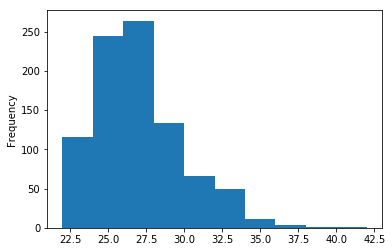

In [30]:
df["Age_based_on_mean"].plot(kind="hist")

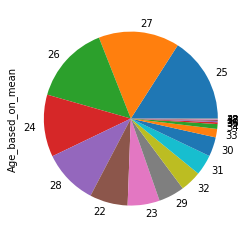

In [33]:
df["Age_based_on_mean"].value_counts().plot(kind='pie')